<p style="font-family: Trebuchet MS; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #b20710">🍁 TPS SEPTEMBER 2021 🍂</p>

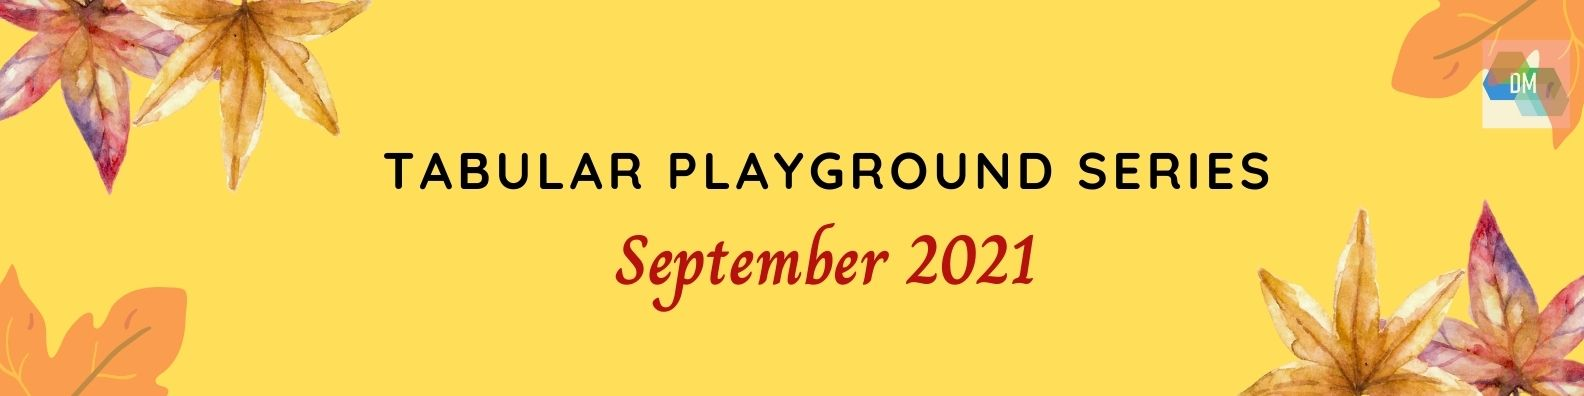

<p style = "font-family: Trebuchet MS; font-size: 16px; color: rgba(0,0,0,.7)"> Observations on this TPS: <li>1. 'claim' column is the target variable </li> <li>2. Train dataset has 957,919 rows and 120 columns</li><li>3. Test dataset has 493,474 rows and 119 columns</li><li>4. In train dataset, every feature has nearly 15,000 missing values totalling 1,820,782 in all</li><li>5. In test dataset, every feature has almost 7,800 missing values totalling 936,218 in all</li></p>

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
df_train= pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv", sep=',')
df_train = df_train.set_index('id')

In [ ]:
df_test= pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv", sep=',')
df_test = df_test.set_index('id')

In [ ]:
df_subm = pd.read_csv("../input/tabular-playground-series-sep-2021/sample_solution.csv")

In [ ]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows (Train):', df_train_row_count)
print('Total number of columns (Train):', df_train_column_count)

In [ ]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows (Test):', df_test_row_count)
print('Total number of columns (Test):', df_test_column_count)

In [ ]:
x = df_train['claim'].value_counts()

fig,ax=plt.subplots(figsize=(7,4))
ax.barh([1],x.values[1],height=0.7,color='#CC5803',alpha=0.7)
plt.text(-35000,1, '1', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)
plt.text(500000,1, '49.84%', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)

ax.barh([0],x.values[0],height=0.7,color='#FFB627',alpha=0.7)
plt.text(-35000,0,'0',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(500000,0, '50.15%',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50,1.77, 'How claim is distributed? - 0 vs 1',{'font': 'Trebuchet MS','weight':'bold','Size': '20','style':'normal', 'color':'#FF9505'}, alpha = 0.9)
plt.text(600000,1.65, '0 ', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#FFB627'},alpha = 0.8)
plt.text(615000,1.65, '|', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.9)
plt.text(625000,1.65, '1',  {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#CC5803'},alpha = 0.7)
plt.text(-50,1.5, 'Nearly equal distribution')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>MLJAR ⏳</centre></strong></h3>

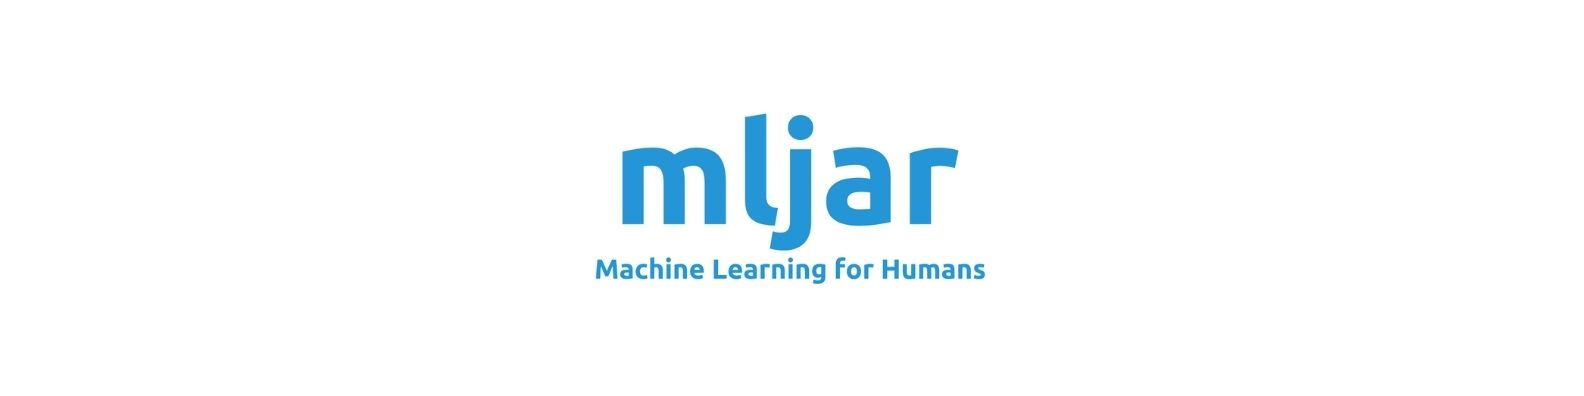

Reference: https://github.com/mljar/mljar-supervised

In [ ]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@dev

In [ ]:
from supervised.automl import AutoML

In [ ]:
# define dataset
X = df_train.drop('claim', axis=1)
y = df_train['claim']

In [ ]:
automl = AutoML(mode = "Compete", golden_features = True, total_time_limit = 1800)
automl.fit(X,y)

In [ ]:
automl.report()

In [ ]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
predictions = automl.predict(X_test)

In [ ]:
y_pred = automl.predict(df_test)

In [ ]:
df_subm['claim'] = y_pred
df_subm

In [ ]:
df_subm.to_csv('submission_mljar.csv', index=False)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>AutoGluon ⏳</centre></strong></h3>

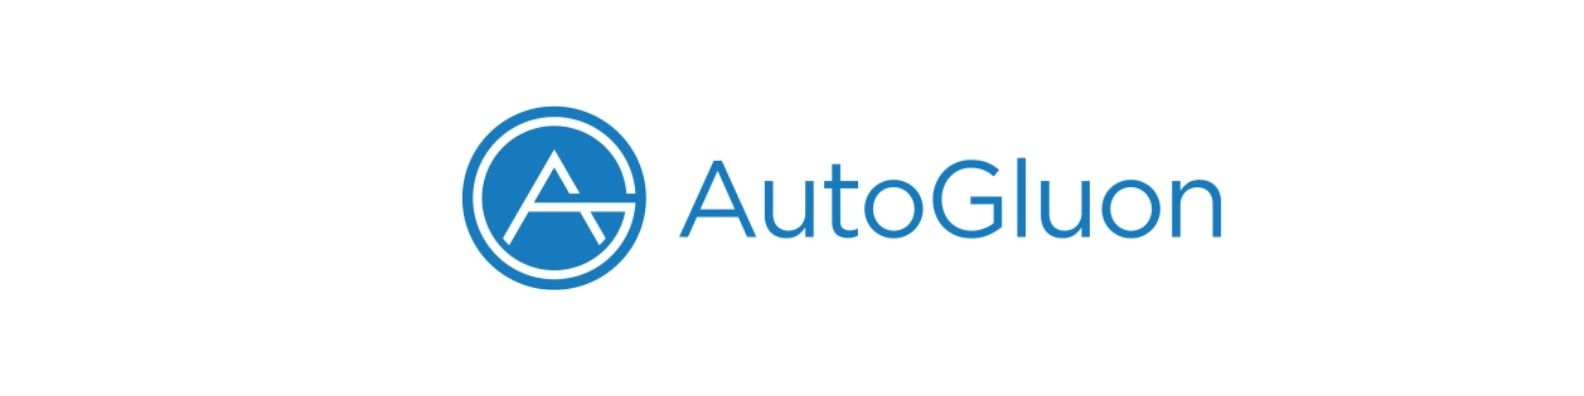

Reference: https://github.com/awslabs/autogluon

In [ ]:
pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
time = 3600*4
pred = TabularPredictor(label ='claim', eval_metric = 'roc_auc').fit(train_data = df_train, time_limit = time, presets ='best_quality', verbosity = 2)
pred.leaderboard(df_train)

In [ ]:
aml = pred.fit_summary()

In [ ]:
y_pred1 = pred.predict(df_test)
y_pred1

In [ ]:
df_subm['claim'] = y_pred1
df_subm

In [ ]:
df_subm.to_csv('submission_autogluon_final.csv',index=False);;

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks!</centre></strong></h3>